<a href="https://colab.research.google.com/github/carloslme/handson-ml2-book/blob/main/06_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Introduction
*Decision Trees* are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets. 

Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.

# Training and Visualizing a Decision Tree
Let's build one Decision Tree and take a look at how it makes predictions.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

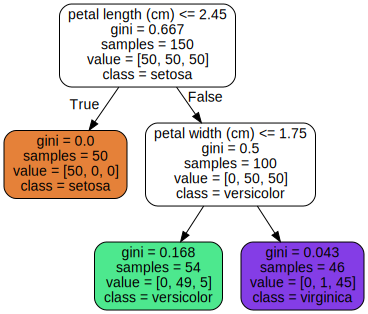

In [6]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# Making Predictions
You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any child nodes), so it does not ask any questions: simply look at the predicted class for that node, and the Decision Tree predicts that your flower is an Iris setosa ( class=setosa ).

Now suppose you find another flower, and this time the petal length is greater than 2.45 cm. You must move down to the root’s right child node (depth 1, right), which is not a leaf node, so the node asks another question: is the petal width smaller than 1.75 cm? If it is, then your flower is most likely an Iris versicolor (depth 2, left). If not, it is likely an Iris virginica (depth 2, right). It’s really that simple.

**Note**

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all. A node’s samples attribute counts how many training instances it applies to. For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left). A node’s value attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris setosa , 1 Iris versicolor , and 45 Iris virginica . Finally, a node’s gini attribute measures its impurity : a node is “pure” ( gini=0 ) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its gini score is 0. Equation 6-1 shows how the training algorithm computes the gini score G i of the i th node. The depth-2 left node has a gini score equal to 1 – (0/54) 2 – (49/54) 2 – (5/54) 2 ≈ 0.168.